**Amazon Reviews Sentiment Analysis Project**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

**Data Collection**

In [5]:
df = pd.read_csv('/content/data/amazon_reviews.csv', nrows=10000)

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df.shape

(10000, 10)

In [8]:
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,0
Text,0


**Data Exploration and Preprocessing**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      10000 non-null  int64 
 1   ProductId               10000 non-null  object
 2   UserId                  10000 non-null  object
 3   ProfileName             10000 non-null  object
 4   HelpfulnessNumerator    10000 non-null  int64 
 5   HelpfulnessDenominator  10000 non-null  int64 
 6   Score                   10000 non-null  int64 
 7   Time                    10000 non-null  int64 
 8   Summary                 10000 non-null  object
 9   Text                    10000 non-null  object
dtypes: int64(5), object(5)
memory usage: 781.4+ KB


In [10]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,10000.00000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,5000.50000,1.573500,2.014900,4.134500,1.294359e+09
std,2886.89568,5.230634,5.807551,1.327172,4.769699e+07
min,1.00000,0.000000,0.000000,1.000000,9.617184e+08
25%,2500.75000,0.000000,0.000000,4.000000,1.268762e+09
50%,5000.50000,0.000000,1.000000,5.000000,1.307837e+09
75%,7500.25000,2.000000,2.000000,5.000000,1.329955e+09
max,10000.00000,187.000000,216.000000,5.000000,1.351210e+09


In [11]:
# Check for duplicate entries
duplicate_entries = df.duplicated().sum()
print(f"Duplicate entries: {duplicate_entries}")

Duplicate entries: 0


In [12]:
df['Score'].value_counts()

,count
Score,
5,6183
4,1433
1,932
3,862
2,590


<ipython-input-14-268c89078a24>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Score', data=df, palette='viridis')


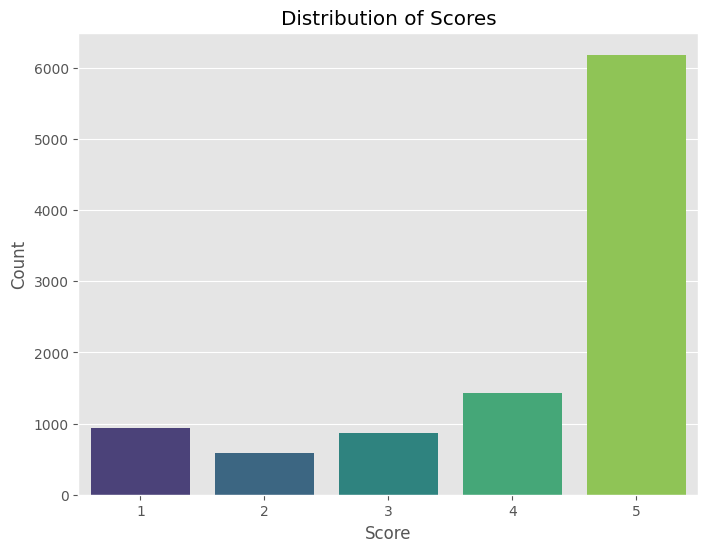

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Score', data=df, palette='viridis')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [15]:
# Drop irrelevant columns
df_cleaned = df.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'Time'], axis=1, errors='ignore')

In [16]:
# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

# Remove duplicates if there are any
df_cleaned = df_cleaned.drop_duplicates()

In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9528 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   HelpfulnessNumerator    9528 non-null   int64 
 1   HelpfulnessDenominator  9528 non-null   int64 
 2   Score                   9528 non-null   int64 
 3   Summary                 9528 non-null   object
 4   Text                    9528 non-null   object
dtypes: int64(3), object(2)
memory usage: 446.6+ KB


In [18]:
df_cleaned.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,0,0,5,Great taffy,Great taffy at a great price. There was a wid...


**Text Preprocessing**

In [19]:
# Import necessary libraries for text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Download required NLTK data files
nltk.download('punkt')  # Tokenizer
nltk.download('stopwords')  # Stopwords
nltk.download('wordnet')  # Lemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [22]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [23]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

In [24]:
# Load stopwords from nltk
stop_words = set(stopwords.words('english'))

In [25]:
# Text cleaning function
def clean_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize the words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string
    clean_text = ' '.join(tokens)

    return clean_text

In [26]:
# Apply the cleaning function to the 'Text' column
df_cleaned['cleaned_text'] = df_cleaned['Text'].apply(clean_text)

In [27]:
df_cleaned[['Text', 'cleaned_text']].head()

,Text,cleaned_text
0,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


**Sentiment Labeling**

In [28]:
# Define a function to label sentiments based on the Score
def label_sentiment(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

In [29]:
# Apply this function to the 'Score' column
df_cleaned['sentiment'] = df_cleaned['Score'].apply(label_sentiment)

# Display the first few rows to check if labels are correct
print(df_cleaned[['Score', 'sentiment', 'cleaned_text']].head())

   Score sentiment                                       cleaned_text
0      5  Positive  bought several vitality canned dog food produc...
1      1  Negative  product arrived labeled jumbo salted peanutsth...
2      4  Positive  confection around century light pillowy citrus...
3      2  Negative  looking secret ingredient robitussin believe f...
4      5  Positive  great taffy great price wide assortment yummy ...


**Train-Test Split**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Split the data into features (X) and labels (y)
X = df_cleaned['cleaned_text']  # Input features (cleaned reviews)
y = df_cleaned['sentiment']  # Target labels (sentiment)

In [32]:
# Perform the train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the number of examples in the training and testing sets
print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 7622
Test set size: 1906


**Text Vectorization (Converting Text to Numbers)**

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
#Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

In [35]:
# Fit and transform the training data, and transform the test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Display the shape of the transformed data
print(f'Training data shape: {X_train_tfidf.shape}')
print(f'Test data shape: {X_test_tfidf.shape}')

Training data shape: (7622, 5000)
Test data shape: (1906, 5000)


**Train the Sentiment Classification Model**

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [42]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable (y_train)
y_train_encoded = le.fit_transform(y_train)

# Initialize the XGBoost classifier model for multi-class classification
xgb_clf = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, objective='multi:softmax')

# Train the model using the TF-IDF-transformed training data
xgb_clf.fit(X_train_tfidf, y_train_encoded)

# Make predictions on the test data
y_pred_xgb = xgb_clf.predict(X_test_tfidf)

# For predictions, transform y_test as well
y_test_encoded = le.transform(y_test)

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.4f}')

# Classification report for XGBoost
print('\nXGBoost Classification Report:')
print(classification_report(y_test_encoded, y_pred_xgb))

# Confusion matrix for XGBoost
print('\nXGBoost Confusion Matrix:')
print(confusion_matrix(y_test_encoded, y_pred_xgb))

XGBoost Accuracy: 0.8080

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.35      0.45       288
           1       0.47      0.11      0.18       153
           2       0.83      0.97      0.89      1465

    accuracy                           0.81      1906
   macro avg       0.65      0.48      0.51      1906
weighted avg       0.77      0.81      0.77      1906


XGBoost Confusion Matrix:
[[ 100    8  180]
 [  24   17  112]
 [  31   11 1423]]


In [49]:
import numpy as np

# Function to predict sentiment for a given input text
def predict_sentiment(text):
    # Preprocess the input text (transform it into TF-IDF form)
    text_tfidf = tfidf.transform([text])  # Transform the input text

    # Make prediction using the trained XGBoost model
    sentiment_encoded = xgb_clf.predict(text_tfidf)

    # Decode the predicted sentiment back to the original label
    sentiment_decoded = le.inverse_transform(sentiment_encoded)

    return sentiment_decoded[0]  # Return the predicted sentiment label

# Example usage:
example_text = "The food at the restaurant was awful."
predicted_sentiment = predict_sentiment(example_text)
print(f'The predicted sentiment is: {predicted_sentiment}')


The predicted sentiment is: Negative


In [50]:
import pickle

# Function to save the model and components to disk
def save_model_and_components(model, vectorizer, encoder, filename_prefix):
    with open(f'{filename_prefix}_model.pkl', 'wb') as model_file:
        pickle.dump(model, model_file)  # Save the XGBoost model

    with open(f'{filename_prefix}_vectorizer.pkl', 'wb') as vectorizer_file:
        pickle.dump(vectorizer, vectorizer_file)  # Save the TF-IDF vectorizer

    with open(f'{filename_prefix}_encoder.pkl', 'wb') as encoder_file:
        pickle.dump(encoder, encoder_file)  # Save the LabelEncoder

    print(f'Model and components saved with prefix: {filename_prefix}')

save_model_and_components(xgb_clf, tfidf, le, 'sentiment_analysis')


Model and components saved with prefix: sentiment_analysis
